In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_excel('/kaggle/input/google-stock-data/Google Dataset.xlsx')

In [3]:
data

,Month Starting,Open,High,Low,Close,Change %,Avg. Volume
0,"Dec. 01, 2022",101.38,102.59,100.67,101.28,-0.0017,21771536
1,"Nov. 01, 2022",95.59,101.45,83.45,101.45,0.0717,28294944
2,"Oct. 03, 2022",97.22,105.10,91.90,94.66,-0.0155,27843110
3,"Sep. 01, 2022",109.20,112.64,96.03,96.15,-0.1191,25381194
4,"Aug. 01, 2022",115.53,123.26,108.80,109.15,-0.0642,18737451
...,...,...,...,...,...,...,...
101,"Jul. 01, 2014",28.92,29.98,28.25,28.58,-0.0064,31411358
102,"Jun. 02, 2014",28.03,29.12,26.94,28.76,0.0275,36121936
103,"May. 01, 2014",26.35,28.39,25.16,27.99,0.0631,34808252
104,"Apr. 01, 2014",27.93,30.24,25.14,26.33,-0.0544,64037909


In [6]:
data['Month Starting'] = data['Month Starting'].replace(['May. 01,2020'], 'May. 01, 2020')
data['Month Starting'] = data['Month Starting'].replace(['May. 01,2019'], 'May. 01, 2019')
data['Month Starting'] = data['Month Starting'].replace(['May. 01,2018'], 'May. 01, 2018')

In [7]:
def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, '%b. %d, %Y').strftime('%m-%d-%Y')
    
data['Month Starting'] = data['Month Starting'].apply(date_convert)


In [9]:
data.isnull().sum()

Month Starting    0
Open              0
High              0
Low               0
Close             0
Change %          0
Avg. Volume       0
dtype: int64

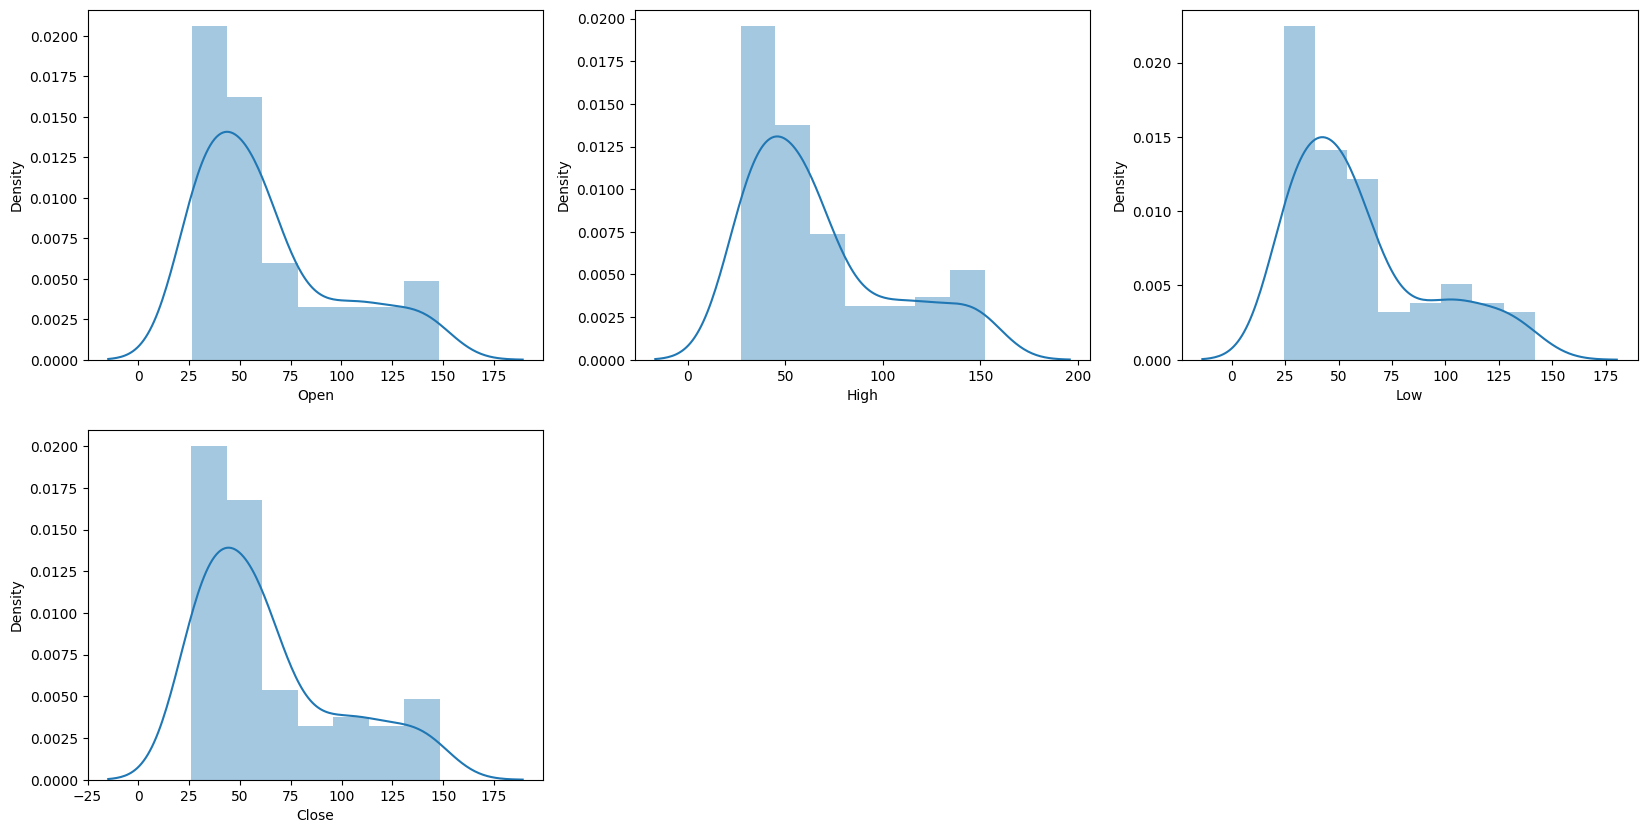

In [16]:
features=['Open','High','Low','Close']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(data[col])
plt.show()

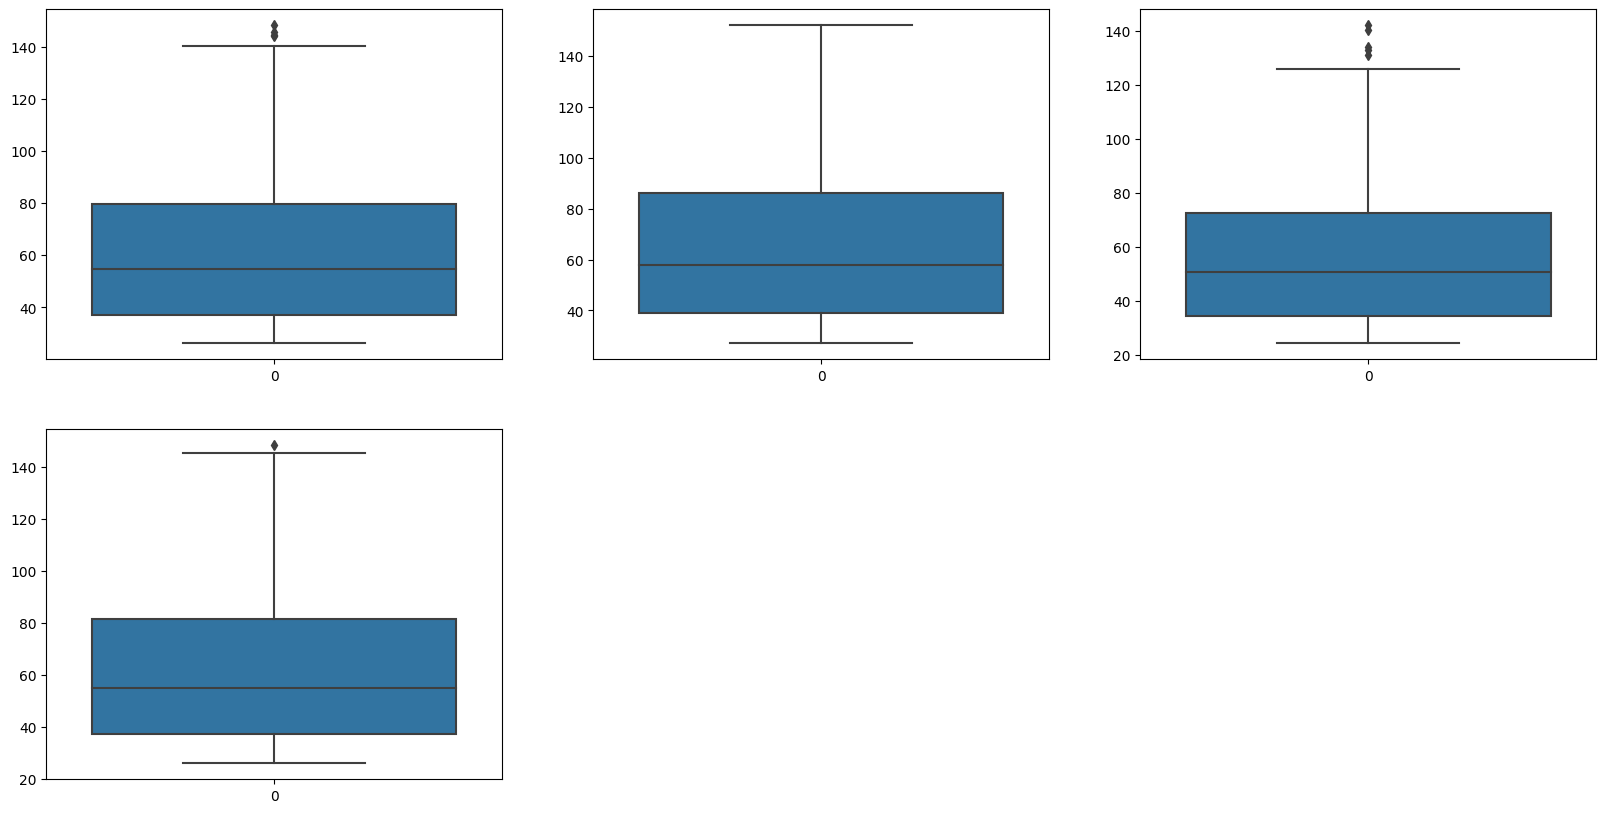

In [17]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(data[col])
plt.show()

<Axes: >

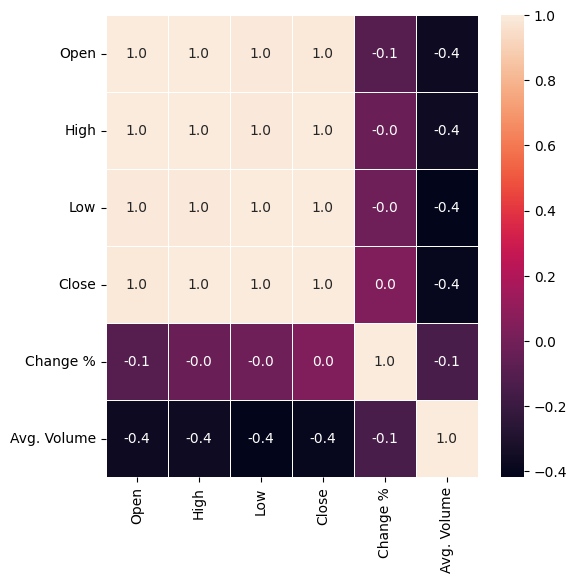

In [59]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [20]:
model=RandomForestRegressor()
x=data[['Open','High','Low']]
x=x[:int(len(data)-1)]
y=data['Close']
y=y[:int(len(data)-1)]
model.fit(x,y)
prediction=model.predict(x)
print('The model score is: ',model.score(x,y))

The model score is:  0.9982632225575376


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

prediction = model.predict(x)
mse = mean_squared_error(y, prediction)
mae = mean_absolute_error(y, prediction)
r2 = r2_score(y, prediction)


print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 2.057025345904748
Mean Absolute Error: 0.9296114285714312
R-squared: 0.9982632225575376
